In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [2]:
import ktrain
from ktrain import text

In [3]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Markdown
from IPython.display import display

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv("./data/TrainVal.csv")
data.sample(10)

,tweet,label,tweet_cleaned,tweet_len
886,After revision São Paulo state registers only ...,fake,revis são paulo state regist 26 death covid 19,11
2675,"Between 500,000 and 3.5 million people attende...",fake,"500,000 3.5 million peopl attend anti-corona p...",15
93,Pregnant women with COVID have a 25% higher ra...,real,pregnant women covid 25 higher rate prematur b...,13
5126,"You can beat the virus with warm water, salt o...",fake,beat viru warm water salt vinegar,11
4531,An excerpt from a document from the Ministry o...,fake,excerpt document ministri health follow messag...,54
6413,States like New York Illinois and California h...,fake,state like new york illinoi california vocal d...,38
6721,The leader of the UK's six million trade union...,real,leader uk' six million trade union member dema...,27
7948,Our daily 4 pm update is out! Across 50 states...,real,daili 4 pm updat across 50 state dc we'v track...,43
5337,Says the U.S. is developing an ???antivirus??�...,fake,say u develop antiviru � includ chip track mov...,15
1624,Yesterday our laboratories completed 2057 test...,real,yesterday laboratori complet 2057 test bring t...,18


In [5]:
data.tweet.str.split().apply(len).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

count    8560.00000
mean       26.94778
std        22.45087
min         3.00000
25%        15.00000
50%        25.00000
75%        37.00000
90%        44.00000
95%        47.00000
max      1456.00000
Name: tweet, dtype: float64

In [6]:
data.label.value_counts()

real    4480
fake    4080
Name: label, dtype: int64

In [7]:
trn, val, preproc = text.texts_from_df(
    data,
    text_column = "tweet",
    label_columns="label",
    maxlen=50,
    ngram_range=1,
    random_state=41,
    preprocess_mode="standard"
)

['fake', 'real']
      fake  real
5065   1.0   0.0
4761   0.0   1.0
2623   1.0   0.0
7367   1.0   0.0
3498   1.0   0.0
['fake', 'real']
      fake  real
1214   1.0   0.0
6002   1.0   0.0
3262   1.0   0.0
5198   0.0   1.0
2164   0.0   1.0
language: en
Word Counts: 22133
Nrows: 7704
7704 train sequences
train sequence lengths:
	mean : 30
	95percentile : 51
	99percentile : 58
x_train shape: (7704,50)
y_train shape: (7704, 2)
Is Multi-Label? False
856 test sequences
test sequence lengths:
	mean : 28
	95percentile : 49
	99percentile : 56
x_test shape: (856,50)
y_test shape: (856, 2)


In [8]:
model = text.text_classifier('bigru', trn , preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 50
word vectors will be loaded from: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
processing pretrained word vectors...
loading pretrained word vectors...this may take a few moments...


done.


In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 300)      6000000     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 50, 300)     0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 bidirectional (Bidirectional)  (None, 50, 160)      183360      ['spatial_dropout1d[0][0]']  

In [10]:
learner = ktrain.get_learner(model, 
                             train_data=trn, 
                             val_data=val, 
                             batch_size=64)

In [11]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
121/121 [==============================] - 10s 70ms/step - loss: 0.6829 - accuracy: 0.5553
Epoch 2/1024
121/121 [==============================] - 8s 69ms/step - loss: 0.6820 - accuracy: 0.5627
Epoch 3/1024
121/121 [==============================] - 8s 70ms/step - loss: 0.6799 - accuracy: 0.5742
Epoch 4/1024
121/121 [==============================] - 8s 70ms/step - loss: 0.6720 - accuracy: 0.5796
Epoch 5/1024
121/121 [==============================] - 8s 70ms/step - loss: 0.6507 - accuracy: 0.6297
Epoch 6/1024
121/121 [==============================] - 8s 70ms/step - loss: 0.5800 - accuracy: 0.7495
Epoch 7/1024
121/121 [==============================] - 8s 69ms/step - loss: 0.3038 - accuracy: 0.8662
Epoch 8/1024
121/121 [==============================] - 8s 69ms/step - loss: 0.1062 - accuracy: 0.9596
Epoch 9/1024
121/121 [==============================] - 8s 70ms/step - loss: 0.0500 - accura

Three possible suggestions for LR from plot:
	Longest valley (red): 1.89E-04
	Min numerical gradient (purple): 3.33E-04
	Min loss divided by 10 (omitted from plot): 2.47E-03


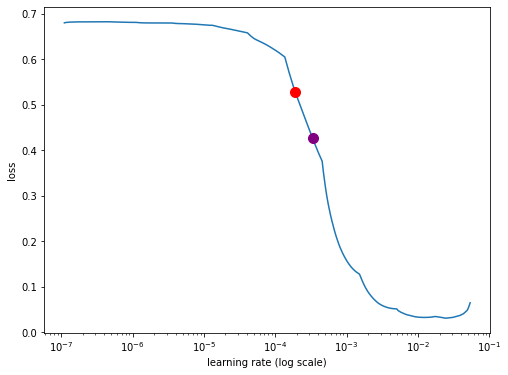

In [12]:
learner.lr_plot(suggest=True)

In [13]:
import gc
gc.collect()

24545

In [14]:
# 2e-5 is one of the LRs  recommended by Google and is consistent with the plot above.
learner.fit_onecycle(1.89E-04, 10)



begin training using onecycle policy with max lr of 0.000189...
Epoch 1/10
121/121 [==============================] - 11s 75ms/step - loss: 0.6596 - accuracy: 0.5990 - val_loss: 0.6223 - val_accuracy: 0.7220
Epoch 2/10
121/121 [==============================] - 9s 71ms/step - loss: 0.5828 - accuracy: 0.7517 - val_loss: 0.5024 - val_accuracy: 0.7967
Epoch 3/10
121/121 [==============================] - 9s 71ms/step - loss: 0.4292 - accuracy: 0.8175 - val_loss: 0.2748 - val_accuracy: 0.8808
Epoch 4/10
121/121 [==============================] - 9s 72ms/step - loss: 0.2175 - accuracy: 0.9115 - val_loss: 0.1559 - val_accuracy: 0.9334
Epoch 5/10
121/121 [==============================] - 9s 71ms/step - loss: 0.1163 - accuracy: 0.9577 - val_loss: 0.1262 - val_accuracy: 0.9486
Epoch 6/10
121/121 [==============================] - 9s 71ms/step - loss: 0.0633 - accuracy: 0.9781 - val_loss: 0.1218 - val_accuracy: 0.9486
Epoch 7/10
121/121 [==============================] - 9s 71ms/step - loss: 

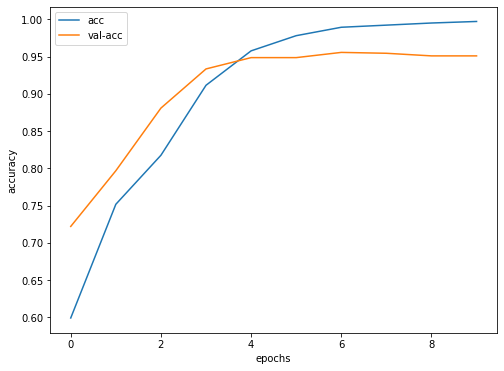

In [15]:
plt.plot(learner.history.history["accuracy"])
plt.plot(learner.history.history["val_accuracy"])
plt.legend(["acc", "val-acc"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

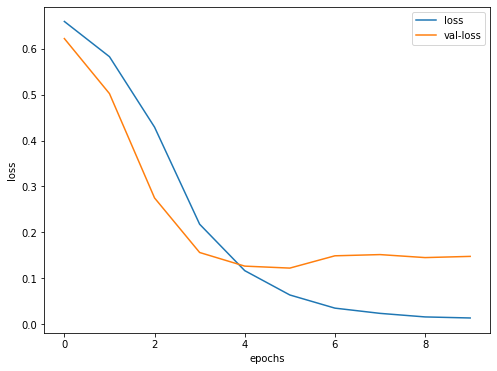

In [16]:
plt.plot(learner.history.history["loss"])
plt.plot(learner.history.history["val_loss"])
plt.legend(["loss", "val-loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [17]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [18]:
test_data = pd.read_csv("./data/TestLabel.csv", index_col=0)
test_data.sample(10)

,tweet,label
id,,
1389,Our total number of confirmed cases is 1220 wh...,real
1901,Nokia distributing free phones to students ami...,fake
224,Two more grim milestones too: * Over 1000 peop...,real
2054,BREAKING: The number of people in the UK who h...,real
1755,From random @Facebook posts to renowned #yoga ...,fake
1450,#IndiaFightsCorona: Five states account for ap...,real
869,Everyone who has left managed isolation since ...,real
1787,#IndiaFightsCorona: The trend of very high num...,real
1410,@HSELive Know another answer? Vitamin D supple...,fake


In [19]:
probs = predictor.predict_proba(test_data["tweet"].values)
probs[:5]

array([[5.2270544e-04, 9.9947733e-01],
       [9.9866402e-01, 1.3359586e-03],
       [9.9991560e-01, 8.4336178e-05],
       [1.0820793e-04, 9.9989176e-01],
       [7.7760423e-04, 9.9922240e-01]], dtype=float32)

In [20]:
y = (test_data.label == "real")
y.head()

id
1     True
2    False
3    False
4     True
5     True
Name: label, dtype: bool

In [21]:
import metrics as mmetrics

In [22]:
y = y.values.reshape((-1, 1))

perfs = mmetrics.get_performance_metrics(y, probs[:, 1:], ["bigru"])
perfs

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
bigru,1078,955,65,42,0.95,0.523,0.962,0.936,0.943,0.958,0.99,0.953,0.5
